In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob
import os

from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Read the JSON generated from the CLI command above and create a pandas dataframe
tweets_df = pd.read_csv('Tweets.csv')

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Tweets.csv to Tweets.csv


In [4]:
import pandas as pd

# Assuming the uploaded file is 'Tweets.csv'
tweets_df = pd.read_csv('Tweets.csv')


In [ ]:
tweets_df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
tweets_df.to_csv()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
tweets_df.shape

(13509, 15)

In [ ]:
tweets_df.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
tweets_df.value_counts()

tweet_id            airline_sentiment  airline_sentiment_confidence  negativereason    negativereason_confidence  airline     airline_sentiment_gold  name             negativereason_gold  retweet_count  text                                                                                                              tweet_coord                  tweet_created              tweet_location  user_timezone             
567778009013178368  negative           1.0000                        Cancelled Flight  1.0000                     United      negative                realmikesmith    Cancelled Flight     0              @united So what do you offer now that my flight was Cancelled Flighted and I'm stranded away from home and work?  [26.37852293, -81.78472152]  2015-02-17 12:10:00 -0800  Chicago         Eastern Time (US & Canada)    1
569887533267611648  negative           0.8563                        Late Flight       0.5938                     US Airways  negative                ConstanceSCHE

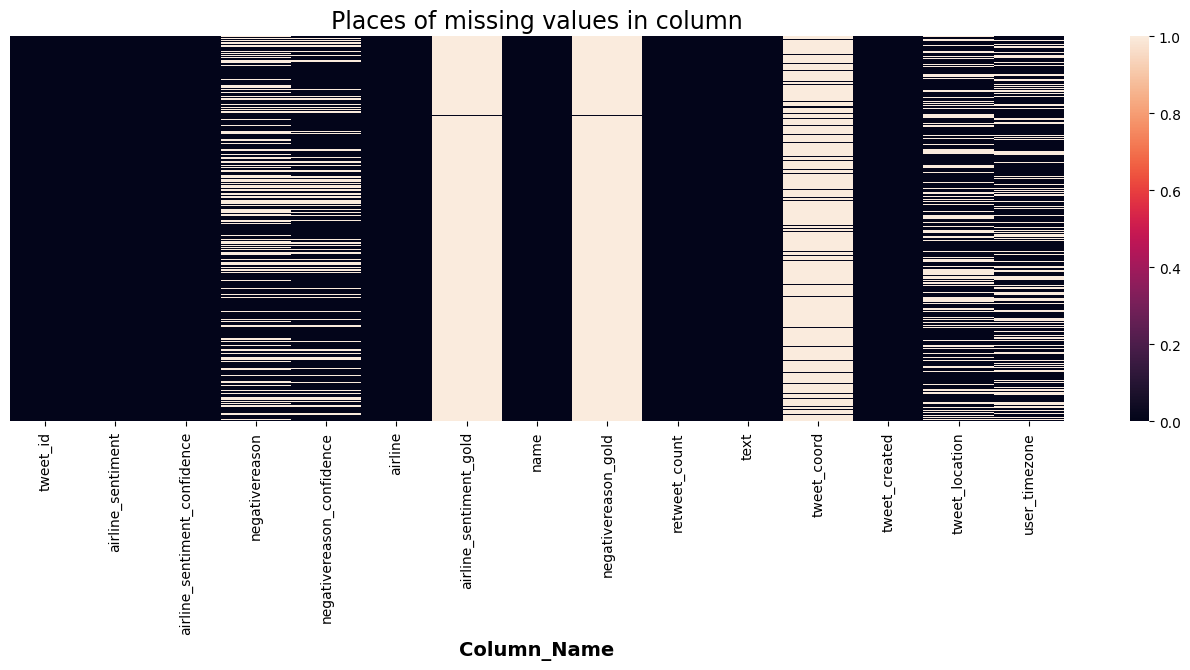

In [8]:
#Heat Map for missing Values
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",size=17)
plt.show()

In [9]:
import plotly.graph_objects as go
Top_Location_Of_tweet= tweets_df['airline'].value_counts().head (10)

In [10]:
print(Top_Location_Of_tweet)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [11]:
from nltk. corpus import stopwords
stop = stopwords.words('english')
tweets_df['text'].apply(lambda x: [item for item in x if item not in stop])
tweets_df.shape

(14640, 15)

In [12]:
!pip install tweet-preprocessor

In [15]:
#Remove unnecessary characters
punct  =  ['%','/',':','\\','&amp','&',';','?']

def remove_punctuations(text):
  for punctuation in punct:
    text = text.replace(punctuation,'')
  return text

In [16]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: remove_punctuations(x))

In [17]:
#Drop tweets that has empty text fields
tweets_df['text'].replace( '', np.nan, inplace=True)
tweets_df.dropna(subset=["text"],inplace=True)
len(tweets_df)

14640

In [18]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
from sklearn.feature_extraction. text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'customer', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.
  warnings.warn(
<ipython-input-22-fc4301839994>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = x_pos,y = counts, palette='husl')


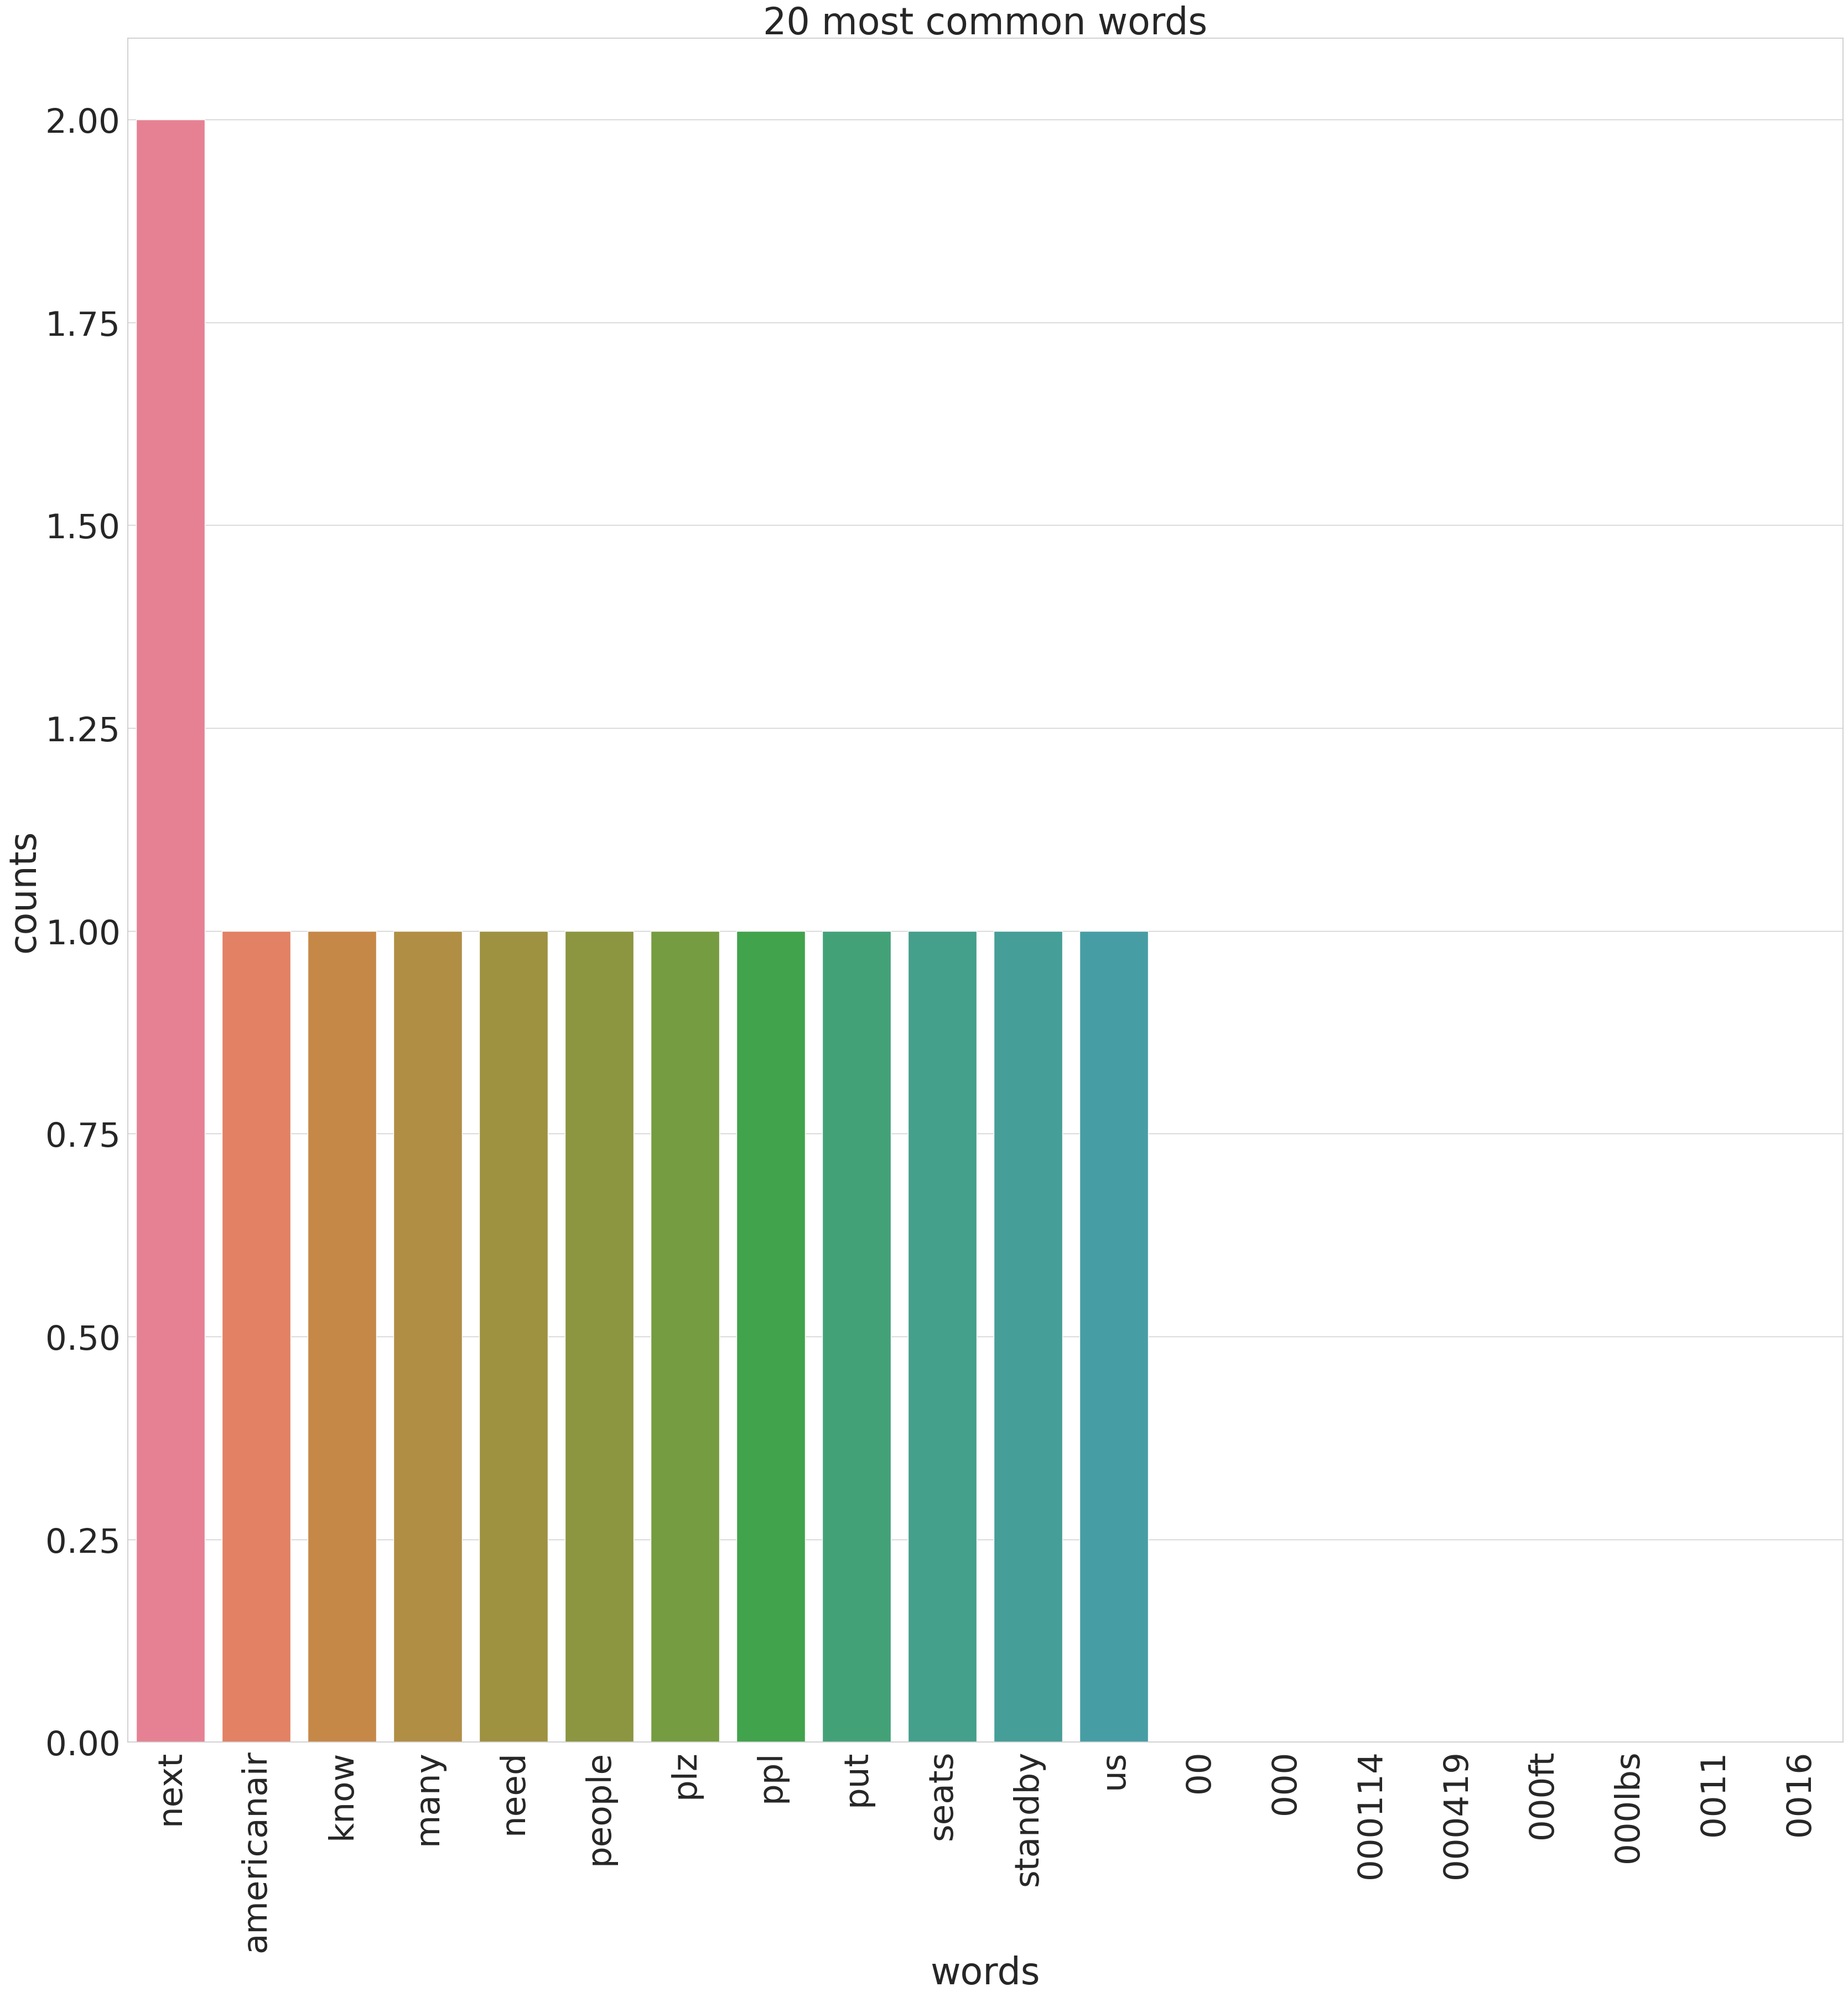

<Figure size 640x480 with 0 Axes>

In [22]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop+['Virgin America' , 'San Francisco' , 'Boston' , 'New York', ' customer' ,'flight' , 'airline', 'San Diego' , 'Oakland' , 'California']
def plot_20_most_common_words(count_data, count_vectorizer) :
  import matplotlib. pyplot as plt
  words = count_vectorizer.get_feature_names_out()
  total_counts = np. zeros(len(words))
  for t in count_data:
    total_counts = t.toarray()[0]

  count_dict = (zip(words, total_counts))
  count_dict = sorted(count_dict, key=lambda x:x[1],reverse=True)[0:20]
  words = [w[0] for w in count_dict]
  counts = [w[1] for w in count_dict]
  x_pos = np.arange(len(words))

  plt.figure(2, (40,40))
  plt.subplot(title = '20 most common words')
  sns. set_context('notebook',font_scale=4,rc={ 'lines.linewidth' :2.5})
  sns.barplot(x = x_pos,y = counts, palette='husl')
  plt.xticks(x_pos, words, rotation=90)
  plt.xlabel('words')
  plt.ylabel('counts')
  plt.show()

count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets_df['text'])
# print(count_vectorizer)
# print(count_data)
# Visualise the 20 most common words
plot_20_most_common_words(count_data,count_vectorizer)
plt.savefig('saved_figure.png')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['america', 'boston', 'california', 'diego', 'francisco', 'new', 'oakland', 'san', 'virgin', 'york'] not in stop_words.
  warnings.warn(
<ipython-input-23-71514098d9d7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


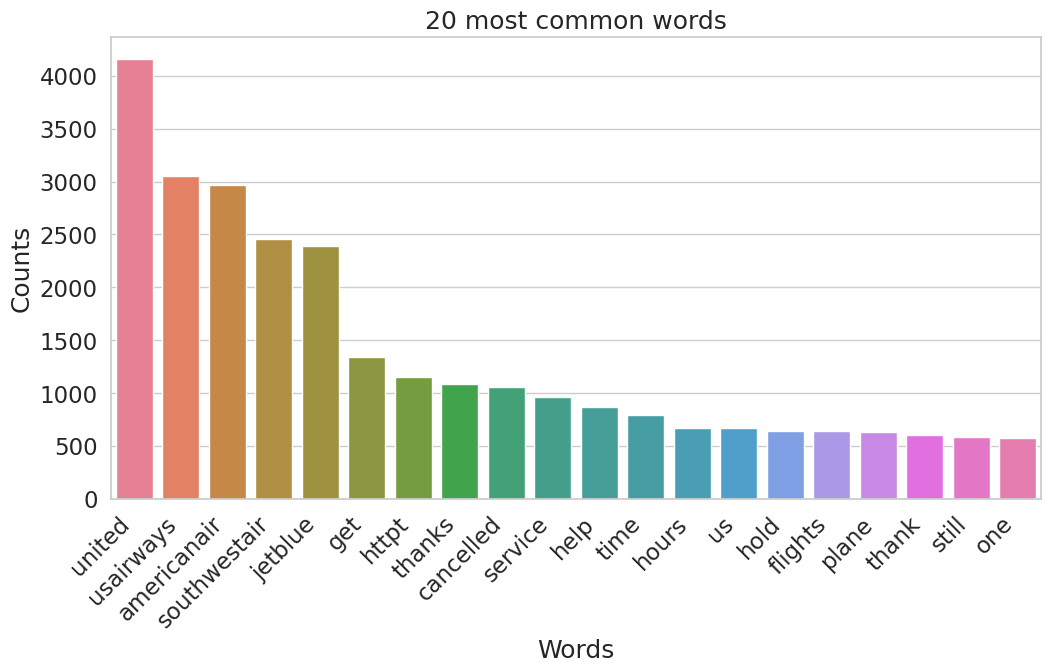

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')
%matplotlib inline

stop = stop + ['Virgin America', 'San Francisco', 'Boston', 'New York', 'customer', 'flight', 'airline', 'San Diego', 'Oakland', 'California']

def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = dict(zip(words, total_counts))
    count_dict = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]

    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]

    x_pos = np.arange(len(words))

    plt.figure(figsize=(12, 6))
    sns.set_context('notebook', font_scale=1.5)
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.title('20 most common words')
    plt.xticks(x_pos, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words=stop)
count_data = count_vectorizer.fit_transform(tweets_df['text'])

# Visualize the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


<Axes: title={'center': 'Top 8 bigrams'}, ylabel='ngram'>

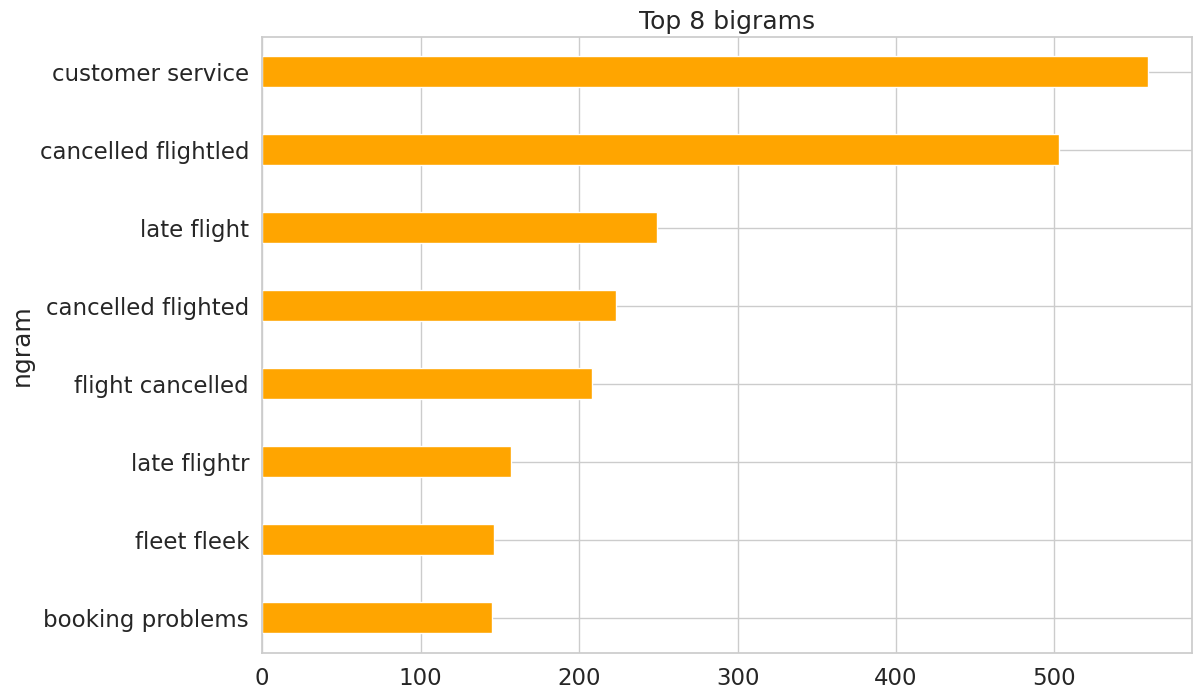

In [24]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None) :
  vec = CountVectorizer(ngram_range=(2, 4), stop_words="english").fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq =[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

common_words = get_top_n_bigram(tweets_df['text'] , 8)
mydict={}
for word, freq in common_words:
  bigram_df = pd.DataFrame(common_words,columns = ['ngram', 'count'])

bigram_df.groupby( 'ngram' ).sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title = 'Top 8 bigrams',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [25]:
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [26]:
tweets_df['subjectivity']=tweets_df[ 'text'].apply(get_subjectivity)
tweets_df['polarity']=tweets_df[ 'text'].apply(get_polarity)
tweets_df.loc[:,['airline','text','airline_sentiment','subjectivity','polarity']].head(20)

,airline,text,airline_sentiment,subjectivity,polarity
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral,0.000000,0.000000
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive,0.000000,0.000000
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral,0.687500,-0.390625
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative,0.350000,0.006250
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative,0.383333,-0.350000
5,Virgin America,@VirginAmerica seriously would pay $30 a fligh...,negative,0.633333,-0.208333
6,Virgin America,"@VirginAmerica yes, nearly every time I fly VX...",positive,0.650000,0.450000
7,Virgin America,@VirginAmerica Really missed a prime opportuni...,neutral,0.200000,0.200000
8,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! -D",positive,0.000000,0.000000
9,Virgin America,"@VirginAmerica it was amazing, and arrived an ...",positive,0.600000,0.466667


**5. Sentiment Analysis**

In [27]:
tweets_df['textblob_score'] =tweets_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [28]:
neutral_threshold=0.05

In [29]:

tweets_df['textblob_sentiment']=tweets_df[ 'textblob_score'].apply(lambda c:'positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral' ) )

In [30]:
textblob_df =  tweets_df[['text','textblob_sentiment','retweet_count']]
textblob_df

,text,textblob_sentiment,retweet_count
0,@VirginAmerica What @dhepburn said.,Neutral,0
1,@VirginAmerica plus you've added commercials t...,Neutral,0
2,@VirginAmerica I didn't today... Must mean I n...,Negative,0
3,@VirginAmerica it's really aggressive to blast...,Neutral,0
4,@VirginAmerica and it's a really big bad thing...,Negative,0
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,Neutral,0
14636,@AmericanAir leaving over 20 minutes Late Flig...,Negative,0
14637,@AmericanAir Please bring American Airlines to...,Neutral,0
14638,"@AmericanAir you have my money, you change my ...",Negative,0


In [31]:
textblob_df["textblob_sentiment"].value_counts()

textblob_sentiment
Neutral     6091
positive    5210
Negative    3339
Name: count, dtype: int64

<Axes: title={'center': 'Sentiment Analysis'}, ylabel='textblob_sentiment'>

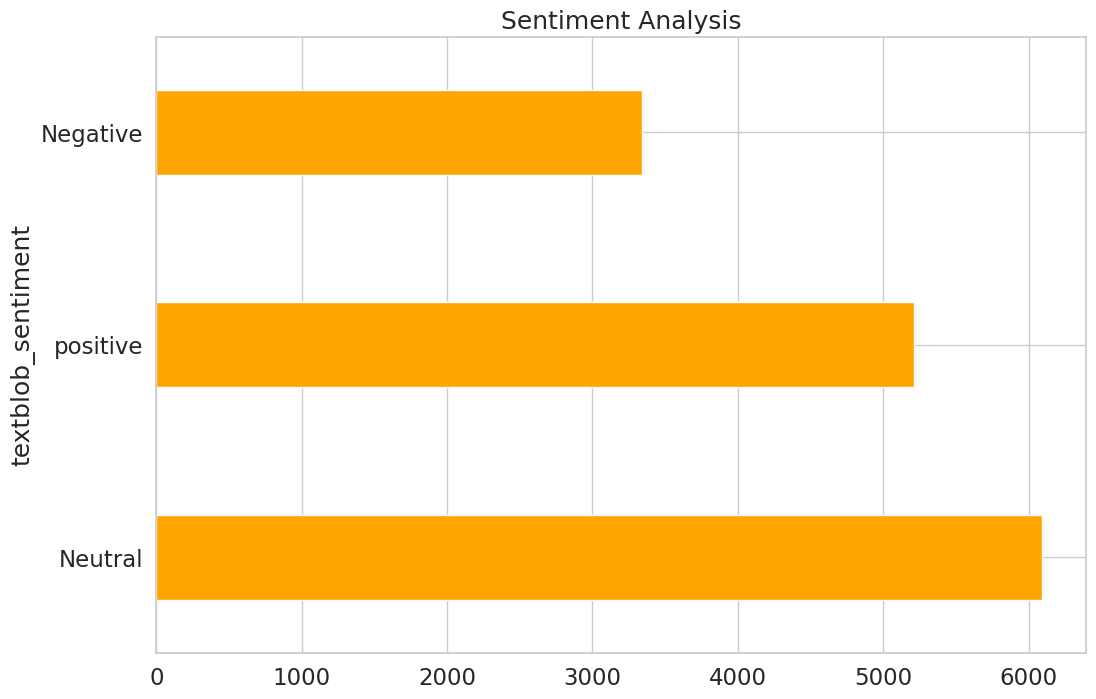

In [32]:
textblob_df["textblob_sentiment"].value_counts().plot.barh(title = 'Sentiment Analysis',color='orange' , width=.4, figsize=(12,8),stacked = True)

In [33]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='positive' ]

In [34]:
df_very_positive=df_positive[df_positive['retweet_count']>0]

In [35]:
df_very_positive.head()

,text,textblob_sentiment,retweet_count
147,Always have it together!!! You're welcome! RT ...,positive,2
264,@VirginAmerica thanks for gate checking my bag...,positive,1
318,@VirginAmerica can u help this 👸 @FreyaBevan_F...,positive,2
336,@VirginAmerica Many Thanks for the Follow.\n#o...,positive,1
402,@VirginAmerica announced New Route to Austin w...,positive,3


In [36]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative' ]

In [37]:
df_negative

,text,textblob_sentiment,retweet_count
2,@VirginAmerica I didn't today... Must mean I n...,Negative,0
4,@VirginAmerica and it's a really big bad thing...,Negative,0
5,@VirginAmerica seriously would pay $30 a fligh...,Negative,0
26,@VirginAmerica What happened 2 ur vegan food o...,Negative,0
32,"@VirginAmerica help, left expensive headphones...",Negative,0
...,...,...,...
14613,"@AmericanAir I used the ""call back"" feature wi...",Negative,0
14618,@AmericanAir 3078 is overweight so you pull 2 ...,Negative,0
14631,@AmericanAir thx for nothing on getting us out...,Negative,0
14636,@AmericanAir leaving over 20 minutes Late Flig...,Negative,0


In [38]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral' ]

In [39]:
df_neutral

,text,textblob_sentiment,retweet_count
0,@VirginAmerica What @dhepburn said.,Neutral,0
1,@VirginAmerica plus you've added commercials t...,Neutral,0
3,@VirginAmerica it's really aggressive to blast...,Neutral,0
8,"@virginamerica Well, I didn't…but NOW I DO! -D",Neutral,0
10,@VirginAmerica did you know that suicide is th...,Neutral,0
...,...,...,...
14624,"@AmericanAir Call me Chairman, or call me Emer...",Neutral,0
14626,@AmericanAir Flight 953 NYC-Buenos Aires has b...,Neutral,0
14633,@AmericanAir my flight was Cancelled Flightled...,Neutral,0
14635,@AmericanAir thank you we got on a different f...,Neutral,0


**Create a Word Cloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

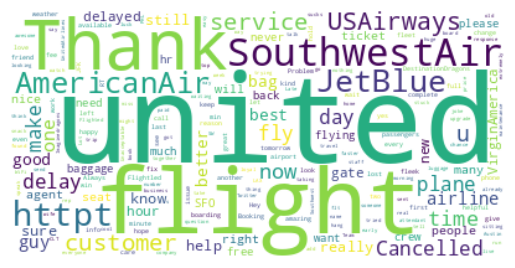

In [40]:
#Creating the text variable
positive_tw =" ".join(t for t in df_very_positive.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud1 = WordCloud(collocations = False, background_color = 'white') .generate(positive_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
!pip install --upgrade pip

#!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [42]:
!pip install wordcloud==1.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for wordcloud
  Running setup.py clean for wordcloud
Failed to build wordcloud
ERROR: Could not build wheels for wordcloud, which is required to install pyproject.toml-based projects


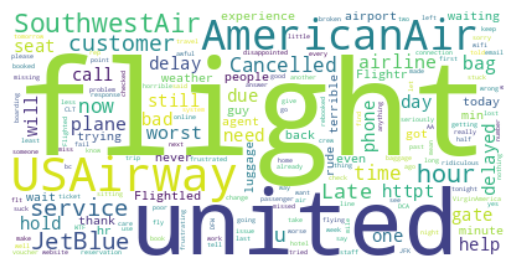

In [43]:
#Creating the text variable
negative_tw =" ".join(t for t in df_negative.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(negative_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

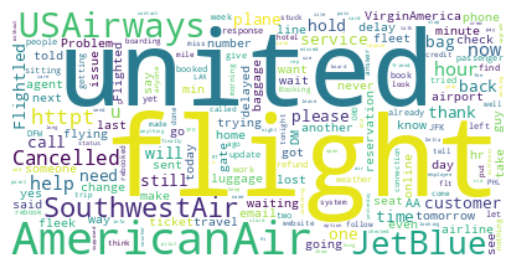

In [44]:
#Creating the text variable
neutral_tw =" ".join(t for t in df_neutral.text)
# Creating word _ cloud with text as argument in . generate() rtpthod
word_cloud2 = WordCloud(collocations = False, background_color = 'white') .generate(neutral_tw)
# Display the generated Word Cloud
plt. imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()